In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
!git clone https://github.com/USC-DSCI-552/homework-1-benson666777888.git

Cloning into 'homework-1-benson666777888'...
fatal: could not read Username for 'https://github.com': No such device or address


 (b)

In [44]:
data,meta = arff.loadarff("column_2C_weka.arff")
df = pd.DataFrame(data)
df["class"] = df["class"].str.decode("utf-8")
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [45]:
df = df[df["class"].isin(["Normal", "Abnormal"])]
df["class"] = df["class"].map({"Normal":0, "Abnormal":1})
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


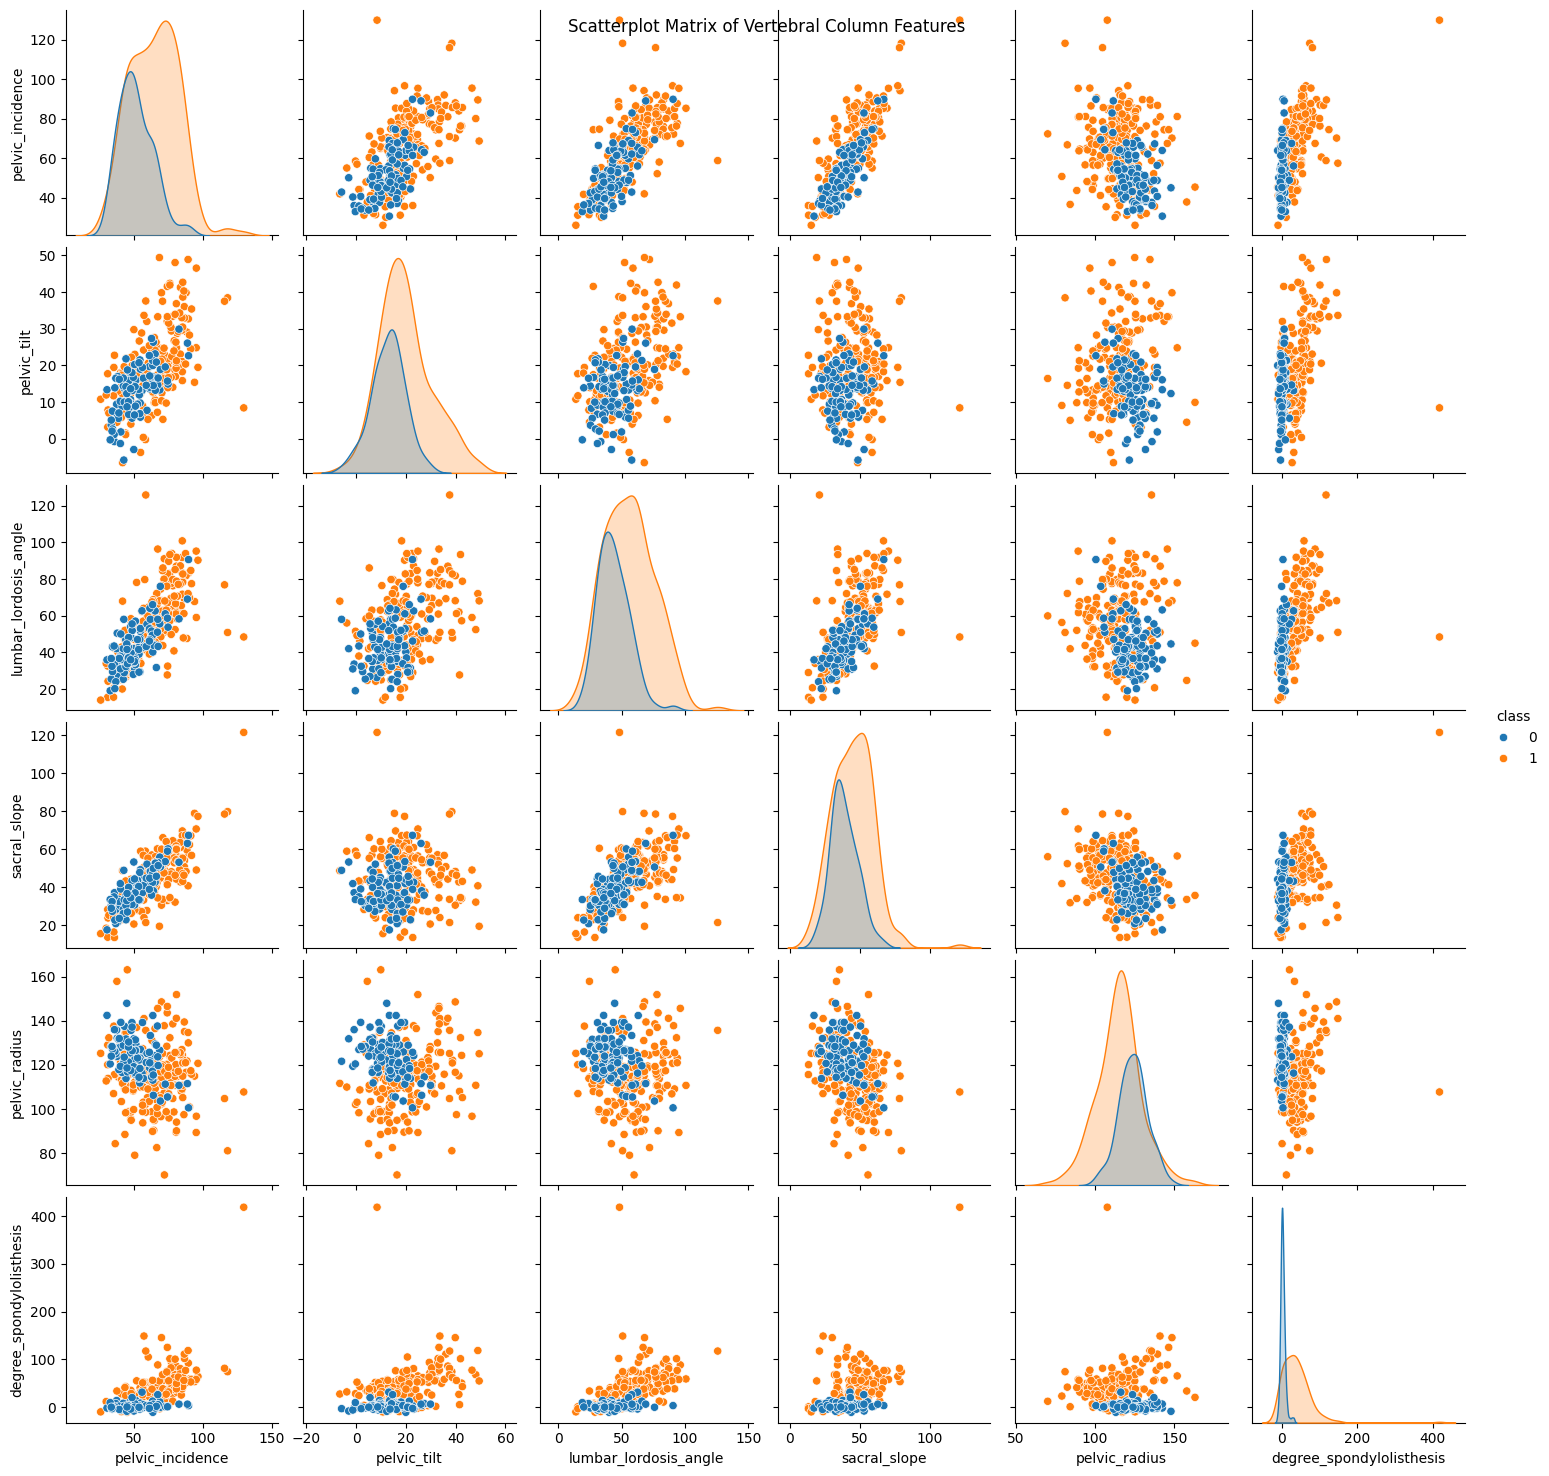

In [94]:
sns.pairplot(df, hue="class", diag_kind="kde")
plt.suptitle("Scatterplot Matrix of Vertebral Column Features")
plt.show()

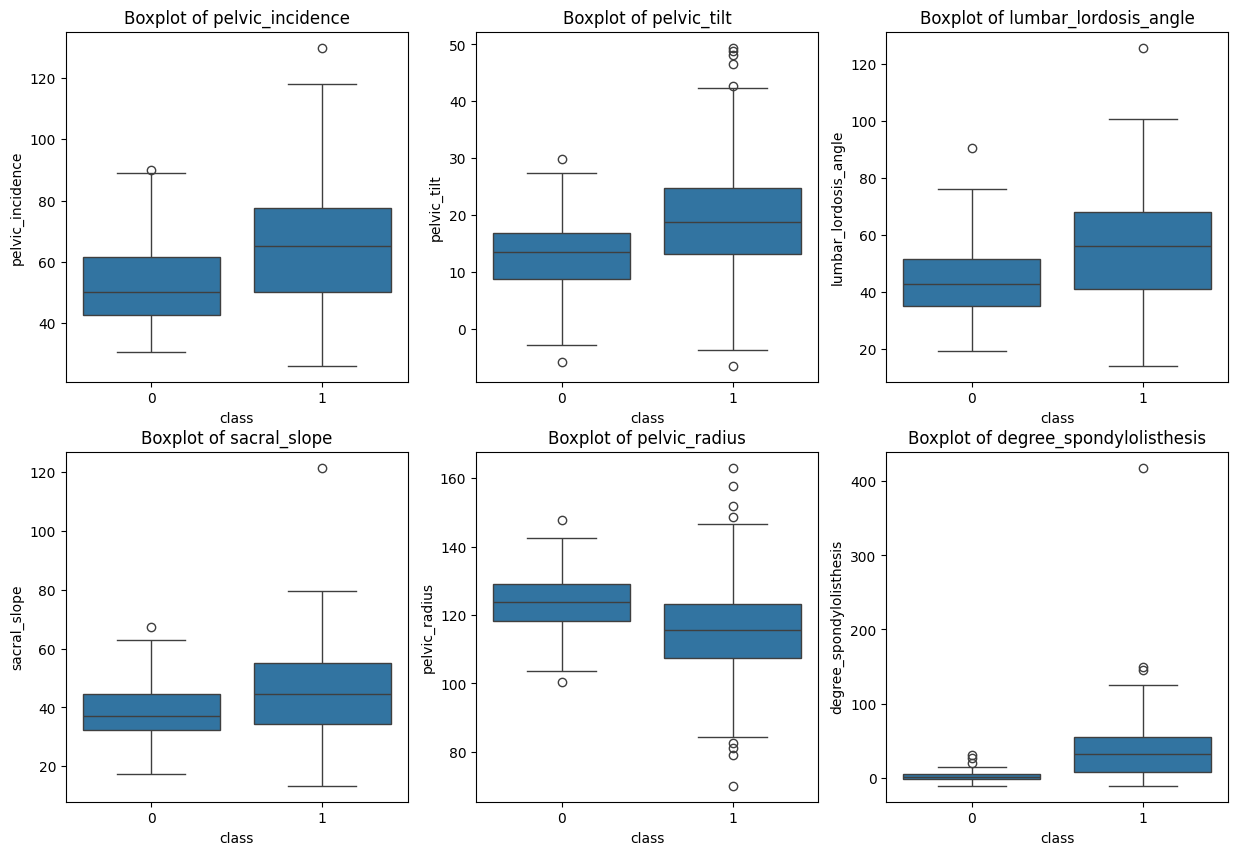

In [97]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="class", y=col, data=df)
    plt.title(f"Boxplot of {col}")
plt.show()

 (c)(i)&(c)(ii)

In [7]:
data0 = df[df["class"] == 0]
data1 = df[df["class"] == 1]

train_data0 = data0[ :70]
train_data1 = data1[ :140]
train_data = pd.concat([train_data0, train_data1])


test_data0 = data0[70:]
test_data1 = data1[140:]
test_data = pd.concat([test_data0, test_data1])

test_data


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

x_train = train_data.drop(columns=["class"])
y_train = train_data["class"]

x_test = test_data.drop(columns=["class"])
y_test = test_data["class"]

k = range(208,0,-3)
test_error = []
train_error = []

for neighbors in k:
  knn = KNeighborsClassifier(n_neighbors=neighbors, metric="euclidean")
  knn.fit(x_train, y_train)
  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)

  train_error.append(1 - accuracy_score(y_train, y_train_pred))
  test_error.append(1 - accuracy_score(y_test, y_test_pred))


best_k = k[np.argmin(test_error)]
print("Best k =", best_k)

best_knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
best_knn.fit(x_train, y_train)
y_test_pred = best_knn.predict(x_test)


confu_ma = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix\n:", confu_ma)

TPR = recall_score(y_test, y_test_pred, pos_label=1)
print("True Positive Rate =", TPR)

TNR = recall_score(y_test, y_test_pred, pos_label=0)
print("True Negative Rate =", TNR)

precision = precision_score(y_test, y_test_pred)
print("Precision score =", precision)

f1 = f1_score(y_test, y_test_pred)
print("F1 score =", f1)



Best k = 4
Confusion Matrix
: [[25  5]
 [ 1 69]]
True Positive Rate = 0.9857142857142858
True Negative Rate = 0.8333333333333334
Precision score = 0.9324324324324325
F1 score = 0.9583333333333334


(c)(iii)

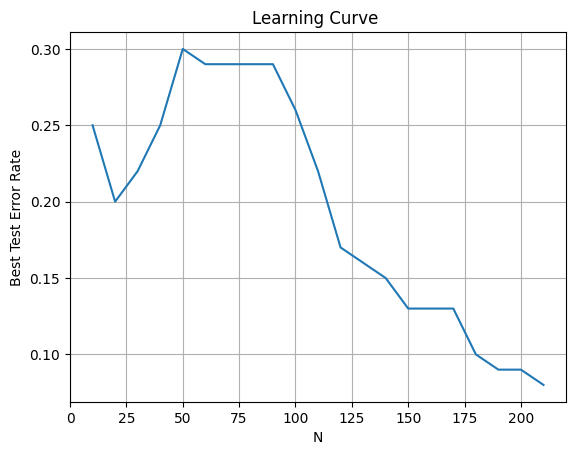

In [42]:
N = range(10,211,10)
best_test_errors = []
for n in N:
  n0 = n // 3
  n1 = n - n0
  sub0 = train_data0[:n0]
  sub1 = train_data1[:n1]
  subest = pd.concat([sub0, sub1])
  x_train = subest.drop(columns=["class"])
  y_train = subest["class"]

  k_new = range(1, n-3, 5)
  test_errors = []

  for k in k_new:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)
  best_test_errors.append(min(test_errors))


plt.plot(N, best_test_errors)
plt.xlabel("N")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve ")
plt.grid(True)
plt.show()

(d)(i)(A)

In [85]:
sum_table = []

k_list = range(1,197,5)
man_best_k = None
best_test_error = 1.0
train_error_new = []
test_error_new = []
for neighbors in k_list:
  knn = KNeighborsClassifier(n_neighbors=neighbors, metric="minkowski", p=1)
  knn.fit(x_train, y_train)
  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)
  test_error = 1 - accuracy_score(y_test, y_test_pred)
  if test_error < best_test_error:
    best_test_error = test_error
    man_best_k = neighbors

print("Best K =", man_best_k, "Best test error =", best_test_error)
sum_table.append(["Manhattan", man_best_k,  best_test_error])

Best K = 1 Best test error = 0.10999999999999999


(d)(i)(B)

In [86]:
log_10_p = np.arange(0.1, 1.1, 0.1)
best_error, best_lg, best_p = 1.0, None, None
for lgs in log_10_p:
  p_value = 10**lgs
  knn = KNeighborsClassifier(n_neighbors=man_best_k, metric="minkowski", p=p_value)
  knn.fit(x_train, y_train)
  y_test_pred = knn.predict(x_test)
  test_error = 1 - accuracy_score(y_test, y_test_pred)
  if test_error < best_error:
    best_error, best_lg, best_p = test_error, lgs, p_value

print("Best log_10(p) =", lgs, "Best test error =", best_test_error, "best p =", best_p)
sum_table.append(["Minkowski", man_best_k, best_test_error])

Best log_10(p) = 1.0 Best test error = 0.10999999999999999 best p = 5.011872336272724


(d)(i)(C)

In [87]:
best_error, che_best_k = 1.0, None
for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_pred)
    if err < best_error:
        best_error, che_best_k = err, k
print("Best K =", che_best_k)
sum_table.append(["Chebyshev",  che_best_k,  best_error])

Best K = 16


(d)(ii)

In [88]:
V = np.cov(x_train.T)
VI = np.linalg.inv(V)
best_error, maha_best_k = 1.0, None
for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={"VI": VI})
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_pred)
    if err < best_error:
        best_error, maha_best_k = err, k
print("Best K =", maha_best_k)
sum_table.append(["Mahalanobis", maha_best_k, best_error])

Best K = 1


In [89]:
df_sum = pd.DataFrame(sum_table, columns=["Metric", "Best k",  "Best Test Error"])
print(df_sum)

            Metric  Best k  Best Test Error
0  Manhattan (p=1)       1             0.11
1        Minkowski       1             0.11
2        Chebyshev      16             0.08
3      Mahalanobis       1             0.14


(e)

In [93]:
k_values = list(range(1, 197, 5))

best_err, best_k = 1.0, None
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_pred)
    if err < best_err:
        best_err, best_k = err, k
print(f"Euclidean   Best k = {best_k}   Best test error = {best_err:.4f}")


best_err, best_k = 1.0, None
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="minkowski", p=1)
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_pred)
    if err < best_err:
        best_err, best_k = err, k
print(f"Manhattan   Best k = {best_k}   Best test error = {best_err:.4f}")


best_err, best_k = 1.0, None
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="chebyshev")
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_pred)
    if err < best_err:
        best_err, best_k = err, k
print(f"Chebyshev   Best k = {best_k}   Best test error = {best_err:.4f}")

Euclidean   Best k = 6   Best test error = 0.1000
Manhattan   Best k = 26   Best test error = 0.1000
Chebyshev   Best k = 16   Best test error = 0.1100


(f)

0.08